<a href="https://colab.research.google.com/github/abdullahmiraz/cnn-models-testing/blob/main/Detecting_Orange_Disease_Using_DenseNet121_%F0%9F%9F%A7%F0%9F%8D%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1847487%2F3016192%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240607%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240607T144541Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D00156ceb3ae322c44791d65235a89cec57ef2aa3b0b320f9f29fa3fd372b3a0ff7827645eabbb3f6dbf705fbf5a8d05236ecfbc750492cdfd8e96c153ef3f2a62ae3c6b62dbbcc770cf9022450555f72e63daeec1d3c4f051602cab7834119d568dde2f4091b6756f23487a24d5dbb0d28be6976fe7e331c6f708e8e776669292f570336001d64369ccb5e10eaa56d709f41052847c91d710d5c1ff2901d9a0e7037a0860c02f5444a0493360277ed64f17dbf6de506fe2f6320daa83063e6cfbb73f662ddbc98774afa6569c8151fc6ad5b95e4b42dbcdb893ccde8a6bf56279086fa598cc97a3244653ae747aa0f200efcd4d411b23591a6b83826e08aa5e9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 241619648 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


# <p style="font-family: 'Amiri'; font-size: 3rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ༘ ೀ⋆｡ ˚ Detecting Orange Disease Using DenseNet121 🟧🍊   ˚ ༘ ೀ⋆｡ ˚</p>

![WhatsApp Image 2024-05-24 at 9.59.18 PM.jpeg](attachment:4da14eb2-9446-45f9-9ecd-168adaddd1f6.jpeg)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ About Data  ˚ ೀ⋆｡ ˚</p>

- Dataset Link: [Orange diseases dataset](https://www.kaggle.com/datasets/jonathansilva2020/orange-diseases-dataset)

- This dataset was developed for the construction of machine learning and deep learning algorithms to perform the classification of diseases in oranges. In this dataset there is the class with fresh oranges and also three other classes of diseases, citrus canker, black spot and greening citrus.

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ About Author  ˚ ೀ⋆｡ ˚</p>

<div style="border: 4px solid Orange; padding: 10px; max-width: 1500px;">
    <p>
        I am <b>Mehak Ifthikhar</b>, a passionate data scientist dedicated to mastering machine learning techniques and continually expanding my knowledge base. I believe in the mantra of #KeepLearning and #KeepSupporting, as I am committed to constant growth and uplifting others in the field.
    </p>
    <div style="text-align: center;">
        <img src="https://media.licdn.com/dms/image/D4D03AQGwFEB6dvmtzQ/profile-displayphoto-shrink_800_800/0/1704969271419?e=1720051200&v=beta&t=H_G2EfX3DGuEbLNdkvjipgJI208iYEadhU6GkqqbDSU" alt="Profile Picture" style="width: 100px; height: 100px; border-radius: 50%; border: 4px solid Orange;"><br>
    </div>
    <p>
        You can find more about me on my <a href="https://github.com/mehakiftikhar" target="_blank">GitHub</a> and <a href="https://www.linkedin.com/in/mehak-iftikhar/" target="_blank">LinkedIn</a>.<br>
        Feel free to connect and reach out for any collaboration or queries!
    </p>
</div>

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ 1|| Import Dependencies  ˚ ೀ⋆｡ ˚</p>

In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2, DenseNet121, Xception, VGG16
import os
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from keras.preprocessing.image import load_img
import cv2
# encode both columns label and variety
from sklearn.preprocessing import LabelEncoder
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ 2|| Train and Validation DataSets ˚ ೀ⋆｡ ˚</p>

In [3]:
#Data_Dir
data_dir = '/kaggle/input//dataset/train'

print('Training Images:')
# Creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

# Testing Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(256, 256),
    batch_size=32)

Training Images:
Found 1164 files belonging to 4 classes.
Using 932 files for training.
Validation Images:
Found 1164 files belonging to 4 classes.
Using 232 files for validation.


# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ 3|| Normalizing Pixel Value ˚ ೀ⋆｡ ˚</p>


In [4]:
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ 4|| Visualizing Images Train Data ˚ ೀ⋆｡ ˚</p>


In [5]:
def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 10px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ blackspot Images ˚ ೀ⋆｡ ˚</p>

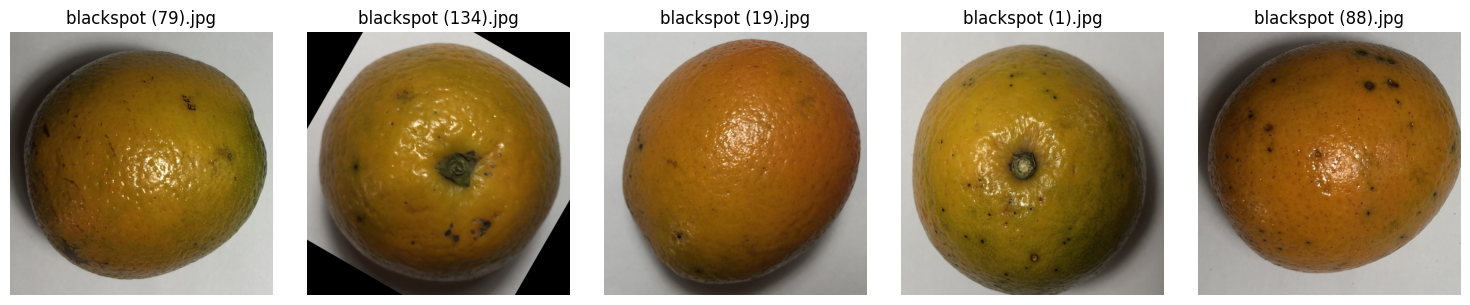

In [6]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input//dataset/train/blackspot"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 10px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ canker Images ˚ ೀ⋆｡ ˚</p>

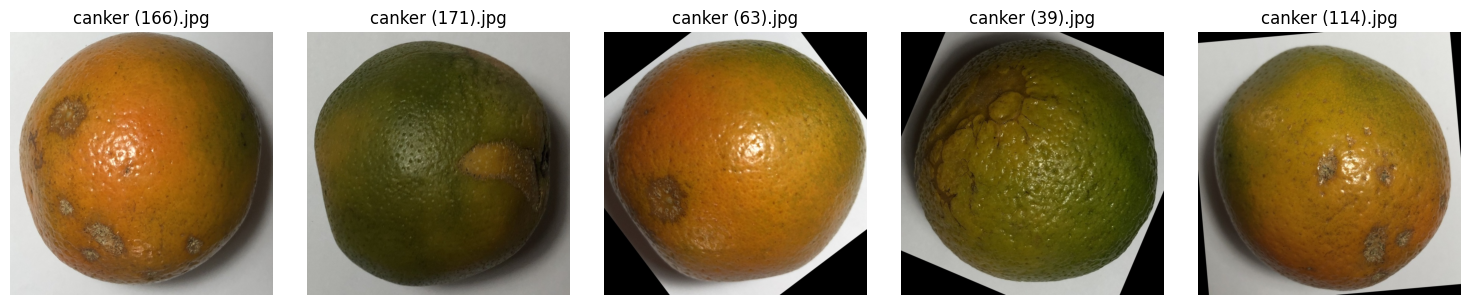

In [7]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input//dataset/train/canker"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 10px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ fresh Images ˚ ೀ⋆｡ ˚</p>

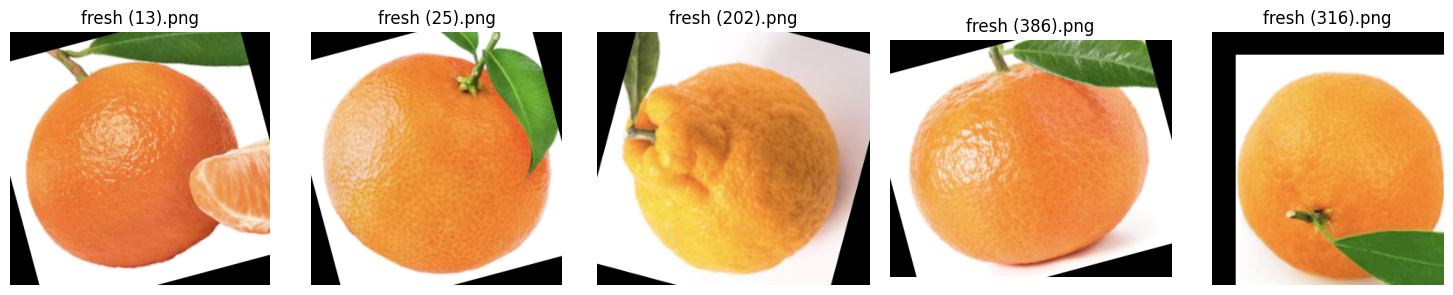

In [8]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/dataset/train/fresh"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 10px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ grenning Images ˚ ೀ⋆｡ ˚</p>

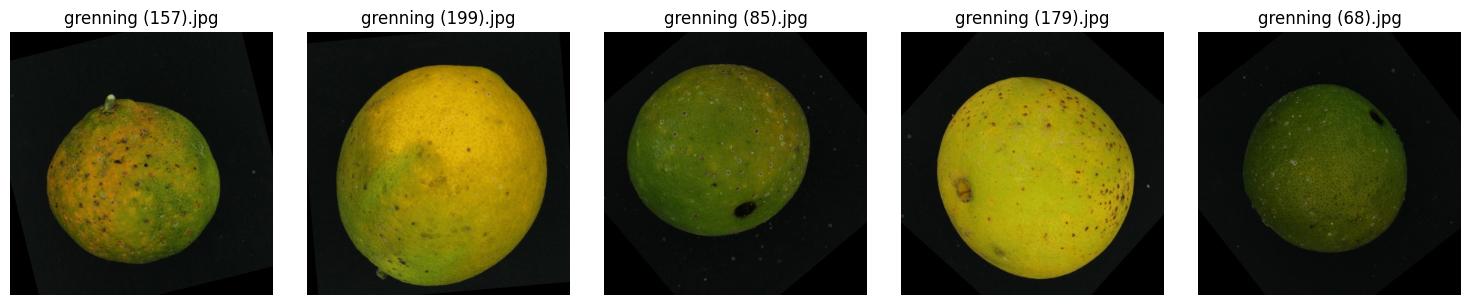

In [9]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/dataset/train/grenning"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ 5|| Modeling ˚ ೀ⋆｡ ˚</p>


# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 15px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ Base Model ˚ ೀ⋆｡ ˚</p>
  


In [10]:
# Load the pre-trained DenseNet121 model without the top classification layer
DenseNet121_base = DenseNet121(weights='imagenet',
                                    include_top=False,
                                   input_shape=(256, 256, 3),
                                     pooling = 'avg'
                                   )

# Freeze the pre-trained base model layers
DenseNet121_base.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 15px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ Building and Compiling the Model ˚ ೀ⋆｡ ˚</p>    


In [11]:
# Build the model
model = Sequential()

# Add base model
model.add(DenseNet121_base)

# Batch Normalization
model.add(BatchNormalization(momentum=0.7, epsilon=1e-5))

# Dropout
model.add(Dropout(0.45))

# Dense Layer
model.add(Dense(220, activation='relu'))

# Dropout
model.add(Dropout(0.25))

# Dense Layer
model.add(Dense(120, activation='relu'))

# Output layer
model.add(Dense(4, activation='softmax'))

# Compile The Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 batch_normalization (Batch  (None, 1024)              4096      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 220)               225500    
                                                                 
 dropout_1 (Dropout)         (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               26520     
                                                        

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 15px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ Model Training ˚ ೀ⋆｡ ˚</p>       


In [15]:
#Early_Stopping
early_stopping = EarlyStopping(
    patience=10,
    restore_best_weights=True,
)

# Train the model
history = model.fit(train_ds,
                    epochs=100,
                    validation_data=validation_ds,
                    callbacks=early_stopping)

Epoch 1/100
30/30 [==============================] - 8s 205ms/step - loss: 0.0527 - accuracy: 0.9796 - val_loss: 0.0257 - val_accuracy: 0.9871
Epoch 2/100
30/30 [==============================] - 7s 204ms/step - loss: 0.0336 - accuracy: 0.9914 - val_loss: 0.0278 - val_accuracy: 0.9871
Epoch 3/100
30/30 [==============================] - 7s 211ms/step - loss: 0.0322 - accuracy: 0.9914 - val_loss: 0.0167 - val_accuracy: 0.9957
Epoch 4/100
30/30 [==============================] - 7s 206ms/step - loss: 0.0465 - accuracy: 0.9785 - val_loss: 0.0463 - val_accuracy: 0.9784
Epoch 5/100
30/30 [==============================] - 8s 248ms/step - loss: 0.0295 - accuracy: 0.9925 - val_loss: 0.0376 - val_accuracy: 0.9784
Epoch 6/100
30/30 [==============================] - 7s 208ms/step - loss: 0.0316 - accuracy: 0.9871 - val_loss: 0.0217 - val_accuracy: 0.9914
Epoch 7/100
30/30 [==============================] - 6s 177ms/step - loss: 0.0251 - accuracy: 0.9903 - val_loss: 0.0104 - val_accuracy: 0.9957

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 15px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ Train Loss and Accuracy ˚ ೀ⋆｡ ˚</p>   

In [16]:
# evaluate the model
loss , acc = model.evaluate(validation_ds)

8/8 [==============================] - 2s 114ms/step - loss: 0.0076 - accuracy: 0.9957


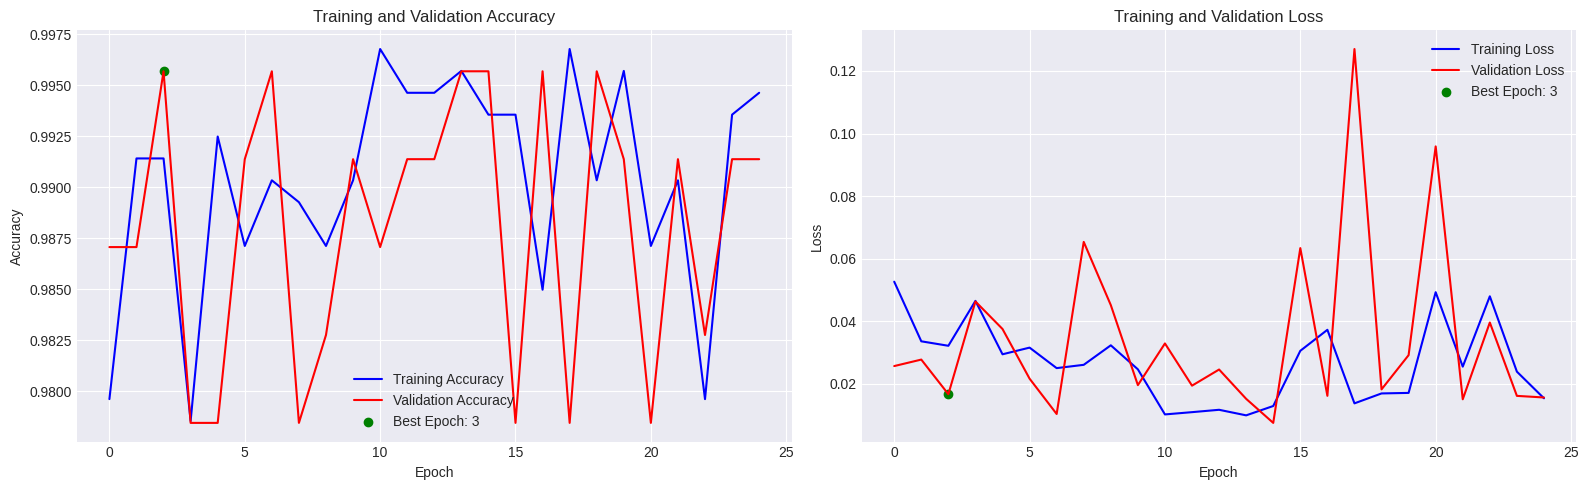

In [17]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: Black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: Orange; padding: 20px; border-radius: 20px; border: 7px solid Black; width:95%">˚ ೀ⋆｡ ˚ The End ˚ ೀ⋆｡ ˚</p>
